In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load data from the Excel file
file_path = r"C:\Users\thoma\Downloads\ARKK_Data.xlsx"
df = pd.read_excel(file_path)

In [29]:
# Convert Date to datetime type and then to numerical for training
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].sub(df['Date'].min()).dt.total_seconds()

In [30]:
# Features: Date, Open, High, Low
X = df[['Date', 'Open', 'High', 'Low']]
# Target variable: Close price
y = df['Close']

In [31]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Creating a linear regression model
model = LinearRegression()

In [33]:
# Training the model with training data
model.fit(X_train, y_train)


LinearRegression()

In [34]:
# Predicting Close prices for test data
y_pred = model.predict(X_test)

In [35]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [36]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 0.06
R-squared: 1.00


In [37]:
# Example prediction for a new data point
new_data_point = pd.DataFrame({
    'Date': [df['Date'].max() + 86400],  # One day after the last date in the dataset
    'Open': [20.5],
    'High': [20.6],
    'Low': [20.4]
})

In [38]:
predicted_close = model.predict(new_data_point)
print(f"Predicted Close Price for the new data point: {predicted_close[0]:.2f}")

Predicted Close Price for the new data point: 20.50


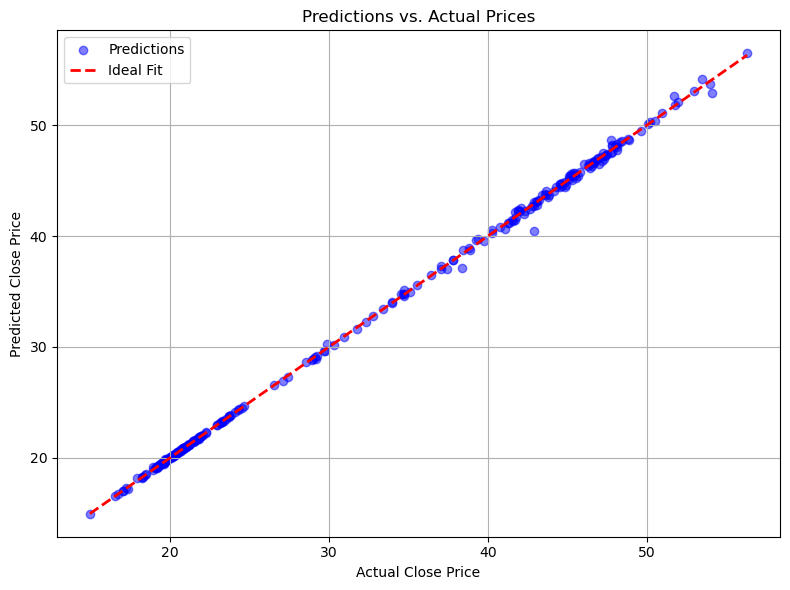

In [44]:

# Create a scatter 
plt.figure(figsize=(8, 6))  # Adjust the figure size
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label="Ideal Fit")
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Predictions vs. Actual Prices")
plt.legend()  # Show legend with labels
plt.grid(True)  # Add grid lines
plt.tight_layout()  # Ensure labels fit within the plot
plt.show()